In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
import random

## Genetic Algorithm

#### Breast Cancer Wisconsin (Diagnostic) Data Set
#### source : https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data?resource=download


Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image

In [2]:
POPULATION_SIZE = 50

In [2]:
#reading the data from a csv file
data =pd.read_csv("data.csv")
data.iloc[0:11]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,28.11,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890
1,842517,M,27.42,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
2,84300903,M,27.22,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
3,84348301,M,25.73,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
4,84358402,M,25.22,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678
5,843786,M,24.63,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440
6,844359,M,24.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
7,84458202,M,23.51,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
8,844981,M,23.29,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720
9,84501001,M,23.27,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750


In [22]:
x = data.iloc[:,2:]
y = data.iloc[: , 1]

In [23]:
y_dummies = pd.get_dummies(housedata["diagnosis"])
df_two = pd.concat((y_dummies, y), axis=1)
df_two = df_two.drop(["diagnosis"], axis=1)
df_two = df_two.drop(["M"], axis=1)
result = df_two.rename(columns={"B": "Class"})
y = np.array(result)

y = y.reshape(-1)


In [24]:
# noramlizing the data
scaler = preprocessing.StandardScaler().fit(x)
x = scaler.transform(x)

In [25]:
#spliting the data to train and test
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.8,random_state=1)

In [26]:
#creating the inital population
data_size = x_train.shape[1]
generation = []
for i in range(POPULATION_SIZE):
    person = np.zeros(data_size)
    
    num_feature = 0
    for i in range(data_size):
        person[i] = random.randint(0,1)
        if person[i] == 1:
            num_feature += 1
        
    if num_feature == 0:
        person[random.randint(0,12)] = 1
        
        
    generation.append(person)
    

In [27]:
#printing a sample of the generation
for i in range(5):
    print(generation[i])

[1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1.
 0. 0. 0. 0. 1. 1.]
[1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1.
 0. 1. 0. 0. 1. 1.]
[0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 0. 0.]
[0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1.
 0. 1. 0. 0. 1. 0.]


In [28]:
logreg = LogisticRegression(solver='lbfgs', max_iter=100)

In [29]:
def fitness(person):
    """
    fitness: computes the fitness for each person in the generation 
    
    parameters:
    
        person: an array of the selected features to use in the module
    
    return
       the fitness of the module from 1000
    """
    global x_test
    global logreg
    x_fitness = x_train.copy()
    x_testing = x_test.copy()
    delete =[]
    features = 0   
    for i in range(data_size):
        if person[i] == 1:
            features += 1
            
    if features == 0:
        person[random.randint(0,12)] = 1         
    
    for i in range(data_size):
        if person[i] == 0:
            delete.append(i)
        
    x_fitness = np.delete(x_fitness,delete,axis = 1)
    x_testing = np.delete(x_testing,delete,axis = 1)
    
    model = logreg.fit(x_fitness,y_train)
    score = 100 * model.score(x_fitness,y_train)
    
    return score

In [30]:
def roulette_wheel(generation):  
    """
    roulette_wheel: generate the probabilites used in roulette wheel selction method
    parameters:
    
        generation: the current population in the cycle
    
    return
       a list of the probabilites of the population
    """
    
    generation_fitness = np.sum([fitness(person) for person in generation])

    individual_prob = [(fitness(person)/generation_fitness) for person in generation]

    return individual_prob , generation_fitness

In [31]:
def roulette_wheel_selection(probability):
    """
    roulette_wheel_selection: randomally choose two individuals from the population using roulette wheel selection method
    
    parameters:
    
        probability: a list of the probabilites of the population
    
    return
       two parnts that can be used in crossover
    """
    rd =np.random.default_rng()
    
    parent1 = rd.choice(generation , p = probability)
    parent2 = rd.choice(generation , p = probability)
    
    return parent1, parent2

In [32]:
def crossover(person1,person2):
    """
    crossover: crossover two persons in the generation to create new ones 
    
    parameters:
    
        person1: an array of the selected features to use in the module
        person2: an array of the selected features to use in the module
    
    return
       two children the product of the crossover between the parents
    """
    global data_size

    cut = random.randint(0,data_size - 1)
    
    child1 = np.zeros(data_size)
    
    
    child1[0:cut] = person1[0:cut]
    child1[cut:] = person2[cut:]
    
    
    
    return child1

In [33]:
def mutation(person):
    """
    cmutation: choose a renadom gene and mutate it  
    
    parameters:
    
        person: an array of the selected features to use in the module
    
    return
       the person after the mutation
    """

    i = random.randint(0,data_size - 1)

    if person[i] == 0:
        person[i] = 1
    
    else:
        person[i] = 0
    
    return person 

In [34]:
accuracy = []

In [35]:
for i in range(50):
    #rank the population according to the fitness
    generation.sort(key=lambda x: fitness(x),reverse = True)
    
    
    print(f"{generation[0]}with fitness {fitness(generation[0])} is the best solution in generation {i}")
    
    #stop the procees if the fitness is high
    if fitness(generation[0]) > 95:
        break
        
        
    nextgeneration = []
    
    #building roulette wheel
    roulette_wheel_prob , generationfitness = roulette_wheel(generation)
    accuracy.append(generationfitness / POPULATION_SIZE)
    
    for i in range(POPULATION_SIZE):
        
        #selecting parents
        parent1 , parent2 = roulette_wheel_selection(roulette_wheel_prob)
        
        #crossover
        child = crossover(parent1,parent2)
        
        #appending the child to the next generation
        nextgeneration.append(mutation(child))
        
    
    generation = nextgeneration

[1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0.
 0. 0. 1. 1. 0. 1.]with fitness 90.76923076923077 is the best solution in generation 0
[1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1.
 1. 0. 1. 1. 1. 1.]with fitness 90.54945054945055 is the best solution in generation 1
[1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0.
 0. 0. 1. 1. 0. 0.]with fitness 90.76923076923077 is the best solution in generation 2
[1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0.
 0. 0. 1. 1. 1. 1.]with fitness 90.98901098901099 is the best solution in generation 3
[1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1.
 0. 0. 0. 0. 1. 0.]with fitness 90.98901098901099 is the best solution in generation 4
[1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0.
 0. 0. 1. 1. 1. 1.]with fitness 90.98901098901099 is the best solution in generation 5
[1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0.
 0. 0. 0. 0. 1. 0.]with fitness 90.98901098901099 is the best solution in generation 51
[1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0.
 1. 1. 0. 1. 1. 0.]with fitness 91.20879120879121 is the best solution in generation 52
[1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0.
 1. 1. 0. 1. 1. 0.]with fitness 91.86813186813187 is the best solution in generation 53


KeyboardInterrupt: 

<function matplotlib.pyplot.show(close=None, block=None)>

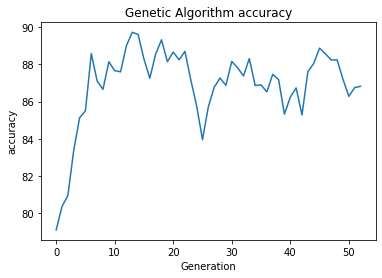

In [39]:
plt.plot(accuracy)
plt.title('Genetic Algorithm accuracy')
plt.xlabel('Generation')
plt.ylabel('accuracy')
plt.show